### **1. Importando as bibliotecas necessárias**

In [15]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from utils.utils import split_data

### **2. Carregando o modelo**

In [16]:
model = keras.models.load_model('../cnn_model.h5')

### **3. Carregando o histórico do modelo**

In [17]:
with open('../cnn_model_history', 'rb') as f:
    history = pickle.load(f)

### **4. Curvas**

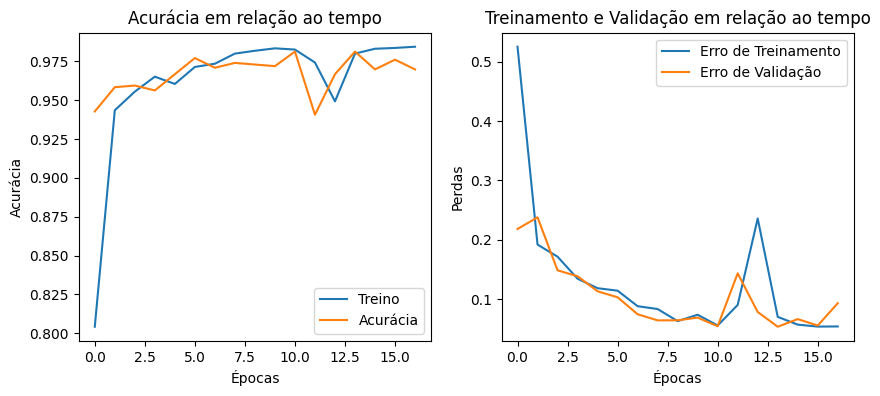

In [18]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Acurácia em relação ao tempo")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend(["Treino", "Acurácia"])

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Treinamento e Validação em relação ao tempo")
plt.xlabel("Épocas")
plt.ylabel("Perdas")
plt.legend(["Erro de Treinamento", "Erro de Validação"])

plt.show()

# 5. Modelo

In [19]:
#load dataset
dataset = pd.read_csv('..\dataset\dataset_final.csv')

#refactor values in filepath column added ../ to the path
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)
dataset.head()

,Filepath,Label
0,../dataset/Positive/07045.jpg,POSITIVE
1,../dataset/Positive/09452.jpg,POSITIVE
2,../dataset/Positive/19030_1.jpg,POSITIVE
3,../dataset/Negative/06463.jpg,NEGATIVE
4,../dataset/Positive/12625_1.jpg,POSITIVE


In [20]:
#split dataset
train_df, test_df = train_test_split(
    dataset.sample(6000, random_state=42), train_size=0.80, random_state=42)

# train, validation and test datas
train_data, validation_data, test_data = split_data(train_df, test_df)
print(f"Total de imagens de treino: {train_data.samples}, Total de imagens de validação: {validation_data.samples}, Total de imagens de teste: {test_data.samples}")


Found 3840 validated image filenames belonging to 2 classes.
Found 960 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.
Total de imagens de treino: 3840, Total de imagens de validação: 960, Total de imagens de teste: 1200


# Modelo CNN

In [23]:
model_prediction = model.predict(test_data)

38/38 [==============================] - 5s 120ms/step


In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, model_prediction.argmax(axis=1), target_names=test_data.class_indices.keys()))

#acuracia
from sklearn.metrics import accuracy_score
print(accuracy_score(test_data.classes, model_prediction.argmax(axis=1)))

              precision    recall  f1-score   support

    NEGATIVE       0.48      1.00      0.65       576
    POSITIVE       0.00      0.00      0.00       624

    accuracy                           0.48      1200
   macro avg       0.24      0.50      0.32      1200
weighted avg       0.23      0.48      0.31      1200

0.48


d:\CILab\surface_crack_detection\surface_crack_detection\cilab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\CILab\surface_crack_detection\surface_crack_detection\cilab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\CILab\surface_crack_detection\surface_crack_detection\cilab\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi